<a href="https://colab.research.google.com/github/NatBiscarra/challenge_TelecomX/blob/main/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Extra√ß√£o dos dados

In [1]:
#Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Leitura dos dados
df = pd.read_json('/content/TelecomX_Data.json')
df.head(5)

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

# 2. Transforma√ß√£o

### Verificar inconsist√™ncias nos dados

In [3]:
#Definindo fun√ß√£o para que os dados sejam "desaninhados" em um dataframe
def processador_dados(json_path):
  df =pd.read_json(json_path) #l√™ e converte os dados em DF e armazena na vari√°vel
  campos = ['customer', 'phone', 'internet', 'account'] #cria lista com nomes das colunas com dados aninhados
  dfs_expand = [pd.json_normalize(df[col]) for col in campos] #normaliza os dados criando novas colunas em um novo DF
  return pd.concat([df[['customerID', 'Churn']]] + dfs_expand, axis=1) #retorna concatenando um DF com as duas primeiras colunas + DF normalizado

dados_limpos = processador_dados('/content/TelecomX_Data.json') #nova vari√°vel com dados tratados

In [4]:
dados_limpos

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO    No  Female              0     Yes        Yes       9   
1     0003-MKNFE    No    Male              0      No         No       9   
2     0004-TLHLJ   Yes    Male              0      No         No       4   
3     0011-IGKFF   Yes    Male              1     Yes         No      13   
4     0013-EXCHZ   Yes  Female              1     Yes         No       3   
...          ...   ...     ...            ...     ...        ...     ...   
7262  9987-LUTYD    No  Female              0      No         No      13   
7263  9992-RRAMN   Yes    Male              0     Yes         No      22   
7264  9992-UJOEL    No    Male              0      No         No       2   
7265  9993-LHIEB    No    Male              0     Yes        Yes      67   
7266  9995-HOTOH    No    Male              0     Yes        Yes      63   

     PhoneService     MultipleLines InternetService  ... OnlineBackup  \
0             Yes                No             DSL  ...          Yes   
1             Yes               Yes             DSL  ...           No   
2             Yes                No     Fiber optic  ...           No   
3             Yes                No     Fiber optic  ...          Yes   
4             Yes                No     Fiber optic  ...           No   
...           ...               ...             ...  ...          ...   
7262          Yes                No             DSL  ...           No   
7263          Yes               Yes     Fiber optic  ...           No   
7264          Yes                No             DSL  ...          Yes   
7265          Yes                No             DSL  ...           No   
7266           No  No phone service             DSL  ...          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes         Yes              No        One year   
1                  No          No          No             Yes  Month-to-month   
2                 Yes          No          No              No  Month-to-month   
3                 Yes          No         Yes             Yes  Month-to-month   
4                  No         Yes         Yes              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7262               No         Yes          No              No        One year   
7263               No          No          No             Yes  Month-to-month   
7264               No          No          No              No  Month-to-month   
7265              Yes         Yes          No             Yes        Two year   
7266              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0                 Yes      Mailed check           65.60          593.3  
1                  No      Mailed check           59.90          542.4  
2                 Yes  Electronic check           73.90         280.85  
3                 Yes  Electronic check           98.00        1237.85  
4                 Yes      Mailed check           83.90          267.4  
...               ...               ...             ...            ...  
7262               No      Mailed check           55.15          742.9  
7263              Yes  Electronic check           85.10         1873.7  
7264              Yes      Mailed check           50.30          92.75  
7265               No      Mailed check           67.85        4627.65  
7266               No  Electronic check           59.00         3707.6  

[7267 rows x 21 columns]

Renomear colunas com letras min√∫sculas e underscores

In [5]:
dados_limpos.rename(columns={'Charges.Monthly': 'monthly_charges',
                             'Charges.Total': 'total_charges'}, inplace=True)


In [6]:
dados_limpos.columns = (
    dados_limpos.columns
    .str.strip()
    .str.replace('([a-z0-9])([A-Z])', r'\1_\2', regex=True)
    .str.replace(' ', '_')
    .str.lower()
)

In [7]:
#Verificar se h√° dados nulos (nans)
dados_limpos.isnull().sum()

customer_id          0
churn                0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
dtype: int64

In [8]:
#Verifica se h√° espa√ßos em branco e substitui por np.nan
dados_limpos['total_charges'] = dados_limpos['total_charges'].replace(' ', np.nan)

#Converte os dados da coluna em float
dados_limpos['total_charges'] = dados_limpos['total_charges'].astype(float)
dados_limpos['total_charges'] = dados_limpos['total_charges'].astype(np.float64)

#Visualiza as informa√ß√µes
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   object 
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   object 
 5   dependents         7267 non-null   object 
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   object 
 8   multiple_lines     7267 non-null   object 
 9   internet_service   7267 non-null   object 
 10  online_security    7267 non-null   object 
 11  online_backup      7267 non-null   object 
 12  device_protection  7267 non-null   object 
 13  tech_support       7267 non-null   object 
 14  streaming_tv       7267 non-null   object 
 15  streaming_movies   7267 non-null   object 
 16  contract           7267 

Verificar duplicatas

In [9]:
#Retorna True (1) ou False(0) para ducplicatas na coluna "customer_id"
dados_limpos['customer_id'].duplicated().sum()

np.int64(0)

Verificar os tipos de dados

In [10]:
dados_limpos.dtypes

customer_id           object
churn                 object
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
dtype: object

Verificar valores ausentes (NaN)

In [11]:
dados_limpos.isnull().sum()

customer_id           0
churn                 0
gender                0
senior_citizen        0
partner               0
dependents            0
tenure                0
phone_service         0
multiple_lines        0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
contract              0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
dtype: int64

In [12]:
#Verifica quais registros de 'total_charges' est√£o com NaN
dados_limpos.query('monthly_charges == 0 | total_charges == 0')

Empty DataFrame
Columns: [customer_id, churn, gender, senior_citizen, partner, dependents, tenure, phone_service, multiple_lines, internet_service, online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies, contract, paperless_billing, payment_method, monthly_charges, total_charges]
Index: []

[0 rows x 21 columns]

In [13]:
#Seleciona todas as linhas em que 'total_charges' possui valores nulos ou ausentes.
dados_limpos[dados_limpos['total_charges'].isnull()]

customer_id churn  gender  senior_citizen partner dependents  tenure  \
975   1371-DWPAZ    No  Female               0     Yes        Yes       0   
1775  2520-SGTTA    No  Female               0     Yes        Yes       0   
1955  2775-SEFEE    No    Male               0      No        Yes       0   
2075  2923-ARZLG    No    Male               0     Yes        Yes       0   
2232  3115-CZMZD    No    Male               0      No        Yes       0   
2308  3213-VVOLG    No    Male               0     Yes        Yes       0   
2930  4075-WKNIU    No  Female               0     Yes        Yes       0   
3134  4367-NUYAO    No    Male               0     Yes        Yes       0   
3203  4472-LVYGI    No  Female               0     Yes        Yes       0   
4169  5709-LVOEQ    No  Female               0     Yes        Yes       0   
5599  7644-OMVMY    No    Male               0     Yes        Yes       0   

     phone_service    multiple_lines internet_service  ...  \
975             No  No phone service              DSL  ...   
1775           Yes                No               No  ...   
1955           Yes               Yes              DSL  ...   
2075           Yes                No               No  ...   
2232           Yes                No               No  ...   
2308           Yes               Yes               No  ...   
2930           Yes               Yes              DSL  ...   
3134           Yes               Yes               No  ...   
3203            No  No phone service              DSL  ...   
4169           Yes                No              DSL  ...   
5599           Yes                No               No  ...   

            online_backup    device_protection         tech_support  \
975                   Yes                  Yes                  Yes   
1775  No internet service  No internet service  No internet service   
1955                  Yes                   No                  Yes   
2075  No internet service  No internet service  No internet service   
2232  No internet service  No internet service  No internet service   
2308  No internet service  No internet service  No internet service   
2930                  Yes                  Yes                  Yes   
3134  No internet service  No internet service  No internet service   
3203                   No                  Yes                  Yes   
4169                  Yes                  Yes                   No   
5599  No internet service  No internet service  No internet service   

             streaming_tv     streaming_movies  contract paperless_billing  \
975                   Yes                   No  Two year                No   
1775  No internet service  No internet service  Two year                No   
1955                   No                   No  Two year               Yes   
2075  No internet service  No internet service  One year               Yes   
2232  No internet service  No internet service  Two year                No   
2308  No internet service  No internet service  Two year                No   
2930                  Yes                   No  Two year                No   
3134  No internet service  No internet service  Two year                No   
3203                  Yes                   No  Two year               Yes   
4169                  Yes                  Yes  Two year                No   
5599  No internet service  No internet service  Two year                No   

                 payment_method monthly_charges  total_charges  
975     Credit card (automatic)           56.05            NaN  
1775               Mailed check           20.00            NaN  
1955  Bank transfer (automatic)           61.90            NaN  
2075               Mailed check           19.70            NaN  
2232               Mailed check           20.25            NaN  
2308               Mailed check           25.35            NaN  
2930               Mailed check           73.35            NaN  
3134               Mailed

Como o campo ``'tenure'`` est√° em 0, significa que o cliente acabou de entrar (justifica o campo  vazio). Por isso, como n√£o h√° um valor informativo √∫til de ``'totalcharges'`` (e preencher com 0 poderia criar um dado falso), foram removidos os 11 registros com dados ausentes no ``'totalcharges'``.


In [14]:
#Remove os valores nulos da coluna
dados_limpos = dados_limpos.dropna(subset=['total_charges'])

In [15]:
#Verifica novamente
dados_limpos.isnull().sum()

customer_id          0
churn                0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
dtype: int64

### Erros de formata√ß√£o em categorias

In [16]:
#Inspeciona as colunas do tipo objeto e lista valores √∫nicos em cada
for col in dados_limpos.select_dtypes(include='object').columns: #.columns funciona como √≠ndice
    print(f"{col}: {dados_limpos[col].unique()}") #printa a coluna e seus valores

customer_id: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
partner: ['Yes' 'No']
dependents: ['Yes' 'No']
phone_service: ['Yes' 'No']
multiple_lines: ['No' 'Yes' 'No phone service']
internet_service: ['DSL' 'Fiber optic' 'No']
online_security: ['No' 'Yes' 'No internet service']
online_backup: ['Yes' 'No' 'No internet service']
device_protection: ['No' 'Yes' 'No internet service']
tech_support: ['Yes' 'No' 'No internet service']
streaming_tv: ['Yes' 'No' 'No internet service']
streaming_movies: ['No' 'Yes' 'No internet service']
contract: ['One year' 'Month-to-month' 'Two year']
paperless_billing: ['Yes' 'No']
payment_method: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [17]:
#Remove os valores vazios, pois n√£o s√£o informativos
dados_limpos = dados_limpos[dados_limpos['churn'] != '']

In [18]:
dados_limpos[dados_limpos['churn'] == '']

Empty DataFrame
Columns: [customer_id, churn, gender, senior_citizen, partner, dependents, tenure, phone_service, multiple_lines, internet_service, online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies, contract, paperless_billing, payment_method, monthly_charges, total_charges]
Index: []

[0 rows x 21 columns]

### Inconsist√™ncias nas categorias

In [19]:
#Verifica a frequ√™ncia de cada valor na coluna
dados_limpos['senior_citizen'].value_counts()

senior_citizen
0    5890
1    1142
Name: count, dtype: int64

In [20]:
#Cria a coluna 'contas_diarias" para calcular o gasto m√©dio por dia com base no valor mensal
dados_limpos['contas_diarias'] = dados_limpos['monthly_charges'] / 30
dados_limpos[['monthly_charges', 'contas_diarias']].head(10)

/tmp/ipython-input-20-912231545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_limpos['contas_diarias'] = dados_limpos['monthly_charges'] / 30


monthly_charges  contas_diarias
0            65.60        2.186667
1            59.90        1.996667
2            73.90        2.463333
3            98.00        3.266667
4            83.90        2.796667
5            69.40        2.313333
6           109.70        3.656667
7            84.65        2.821667
8            48.20        1.606667
9            90.45        3.015000

In [21]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   churn              7032 non-null   object 
 2   gender             7032 non-null   object 
 3   senior_citizen     7032 non-null   int64  
 4   partner            7032 non-null   object 
 5   dependents         7032 non-null   object 
 6   tenure             7032 non-null   int64  
 7   phone_service      7032 non-null   object 
 8   multiple_lines     7032 non-null   object 
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_tv       7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
 16  contract           7032 non-n

### Padroniza√ß√£o e transofrma√ß√£o de dados

In [22]:
#Cria uma lista com os nomes das colunas que cont√™m valores "Yes" e "No"
cols_sim_nao = ['churn', 'partner', 'dependents', 'phone_service', 'paperless_billing']

#Substitui "Yes" e "No" por 1 e 0
dados_limpos[cols_sim_nao] = dados_limpos[cols_sim_nao].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-22-866149730.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_limpos[cols_sim_nao] = dados_limpos[cols_sim_nao].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-22-866149730.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_limpos[cols_sim_nao] = dados_limpos[cols_sim_nao].replace({'Yes': 1, 'No': 0})


In [23]:
#Cria uma lista com as colunas que cont√™m "No internet service" e "No phone service"
no_service_cols = [
    'multiple_lines', 'online_security', 'online_backup',
    'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies'
]

#Substitui por "No"
dados_limpos[no_service_cols] = dados_limpos[no_service_cols].replace({
    'No internet service': 'No', 'No phone service': 'No'
})

In [24]:
#Visualiza o DF
dados_limpos.head()

customer_id  churn  gender  senior_citizen  partner  dependents  tenure  \
0  0002-ORFBO      0  Female               0        1           1       9   
1  0003-MKNFE      0    Male               0        0           0       9   
2  0004-TLHLJ      1    Male               0        0           0       4   
3  0011-IGKFF      1    Male               1        1           0      13   
4  0013-EXCHZ      1  Female               1        1           0       3   

   phone_service multiple_lines internet_service  ... device_protection  \
0              1             No              DSL  ...                No   
1              1            Yes              DSL  ...                No   
2              1             No      Fiber optic  ...               Yes   
3              1             No      Fiber optic  ...               Yes   
4              1             No      Fiber optic  ...                No   

  tech_support streaming_tv streaming_movies        contract  \
0          Yes          Yes               No        One year   
1           No           No              Yes  Month-to-month   
2           No           No               No  Month-to-month   
3           No          Yes              Yes  Month-to-month   
4          Yes          Yes               No  Month-to-month   

  paperless_billing    payment_method  monthly_charges total_charges  \
0                 1      Mailed check             65.6        593.30   
1                 0      Mailed check             59.9        542.40   
2                 1  Electronic check             73.9        280.85   
3                 1  Electronic check             98.0       1237.85   
4                 1      Mailed check             83.9        267.40   

   contas_diarias  
0        2.186667  
1        1.996667  
2        2.463333  
3        3.266667  
4        2.796667  

[5 rows x 22 columns]

In [25]:
#Visualiza as informa√ß√µes sobre os dados
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   churn              7032 non-null   int64  
 2   gender             7032 non-null   object 
 3   senior_citizen     7032 non-null   int64  
 4   partner            7032 non-null   int64  
 5   dependents         7032 non-null   int64  
 6   tenure             7032 non-null   int64  
 7   phone_service      7032 non-null   int64  
 8   multiple_lines     7032 non-null   object 
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_tv       7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
 16  contract           7032 non-n

# 3. Carga e An√°lise

### **An√°lise descritiva - Estat√≠sticas descritivas para os dados num√©ricos**

In [26]:
#Resumo estat√≠stico do DF
dados_limpos.describe()

churn  senior_citizen      partner   dependents       tenure  \
count  7032.000000     7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.265785        0.162400     0.482509     0.298493    32.421786   
std       0.441782        0.368844     0.499729     0.457629    24.545260   
min       0.000000        0.000000     0.000000     0.000000     1.000000   
25%       0.000000        0.000000     0.000000     0.000000     9.000000   
50%       0.000000        0.000000     0.000000     0.000000    29.000000   
75%       1.000000        0.000000     1.000000     1.000000    55.000000   
max       1.000000        1.000000     1.000000     1.000000    72.000000   

       phone_service  paperless_billing  monthly_charges  total_charges  \
count    7032.000000        7032.000000      7032.000000    7032.000000   
mean        0.903299           0.592719        64.798208    2283.300441   
std         0.295571           0.491363        30.085974    2266.771362   
min         0.000000           0.000000        18.250000      18.800000   
25%         1.000000           0.000000        35.587500     401.450000   
50%         1.000000           1.000000        70.350000    1397.475000   
75%         1.000000           1.000000        89.862500    3794.737500   
max         1.000000           1.000000       118.750000    8684.800000   

       contas_diarias  
count     7032.000000  
mean         2.159940  
std          1.002866  
min          0.608333  
25%          1.186250  
50%          2.345000  
75%          2.995417  
max          3.958333

1. Propor√ß√£o de Evas√£o (Churn):

  **M√©dia (churn): 0.265** ‚Üí Cerca de 26,6% dos clientes cancelaram o servi√ßo.

    > üí°Taxa relativamente alta, indicando um problema de reten√ß√£o de clientes.


2. Tempo como Cliente (Tenure):

  **M√©dia: 32,42 meses**

  **Mediana: 29 meses**

  **M√°ximo: 72 meses**

  **M√≠ninmo: 1 m√™s**

    > üí°Boa parte dos clientes permanece por mais de 2 anos, mas tamb√©m h√° muitos com perman√™ncia muito curta, o que pode sugerir rotatividade precoce em certos perfis.



3. Gastos Mensais e Totais

```
  Vari√°vel	        M√©dia	      Mediana	   M√≠nimo	    M√°ximo
monthly_charges	  R$ 64,80	   R$ 70,35	 R$ 18,25	  R$ 118,75
total_charges	 R$ 2.283,30	R$ 1.397,48	 R$ 18,80    R$ 8.684,80
contas_diarias	    R$ 2,16	    R$ 2,35	  R$ 0,61	    R$ 3,96
```

  > üí° Clientes com mensalidades mais altas tendem a ter maior risco de evas√£o. Essa hip√≥tese pode ser testada nas pr√≥ximas an√°lises.



4. Perfil Demogr√°fico e de Servi√ßo

  **Idosos (senior_citizen):** Apenas 16% dos clientes t√™m 65 anos ou mais.

  **Com parceiro(a):** ~48%

  **Com dependentes:** ~30%

  **Com servi√ßo telef√¥nico:** ~90%

  **Fatura digital (paperless_billing):** ~59%

  > üí° A maioria dos clientes n√£o s√£o idosos, n√£o tem dependentes e utiliza cobran√ßa digital. Esses fatores podem ter rela√ß√£o com o 'churn' dependendo da combina√ß√£o com outras vari√°veis (como tipo de contrato ou m√©todo de pagamento).



An√°lise da coluna 'tenure' (tempo como cliente)

Avalia o tempo m√©dio e mediano que os clientes permanecem na empresa. Essa m√©trica √© √∫til para entender a fidelidade m√©dia dos clientes e se h√° tend√™ncia de evas√£o em ciclos curtos.

In [27]:
print(f"Tempo m√©dio como cliente: {dados_limpos['tenure'].mean():.2f}")
print(f"Mediana do tempo:  {dados_limpos['tenure'].median():.2f}")

Tempo m√©dio como cliente: 32.42
Mediana do tempo:  29.00


Investigar o valor financeiro investido pelos clientes mensalmente e ao longo de sua jornada.

Faturas muito altas podem indicar risco de evas√£o, enquanto valores baixos podem sugerir menor engajamento.

In [28]:
print(f"Fatura mensal m√©dia: {dados_limpos['monthly_charges'].mean():.2f}")
print(f"Gasto total m√©dio: {dados_limpos['total_charges'].mean():.2f}")

Fatura mensal m√©dia: 64.80
Gasto total m√©dio: 2283.30


Identifica a propor√ß√£o de clientes que permaneceram *vs*. cancelaram o servi√ßo.

Essa m√©trica √© crucial para entender o problema: *Quanto maior a taxa de evas√£o, maior a necessidade de estrat√©gias de reten√ß√£o*.

In [29]:
dados_limpos['churn'].value_counts(normalize=True) * 100


churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

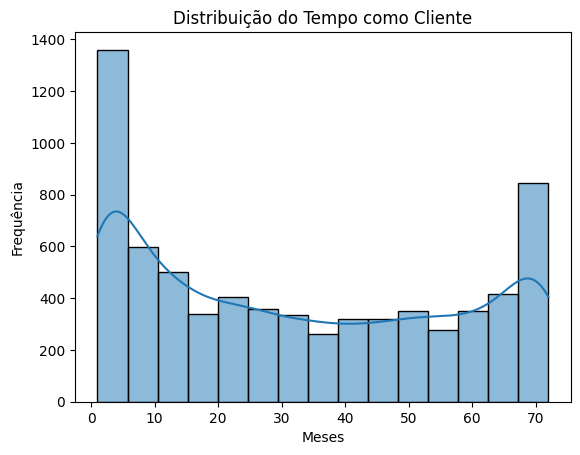

In [30]:
#Histograma para visualizar a dsitribui√ß√£o do tempo como cliente
sns.histplot(dados_limpos['tenure'], kde=True)
plt.title("Distribui√ß√£o do Tempo como Cliente")
plt.xlabel("Meses")
plt.ylabel("Frequ√™ncia")
plt.show()

### **Distribui√ß√£o da Evas√£o**

Visualiza√ß√£o da Evas√£o de Clientes (Churn)

A seguir, dois gr√°ficos que ilustram a distribui√ß√£o da vari√°vel churn, respons√°vel por indicar se o cliente deixou ou permaneceu na empresa:

*   **Gr√°fico de Barras:** mostra a contagem absoluta de clientes que sa√≠ram (1) e que permanceram (0);

*   **Gr√°fico de Pizza:** mostra a propor√ß√£o percentual entre os dois grupos.


Distribui√ß√£o Absoluta Distribui√ß√£o Percentual

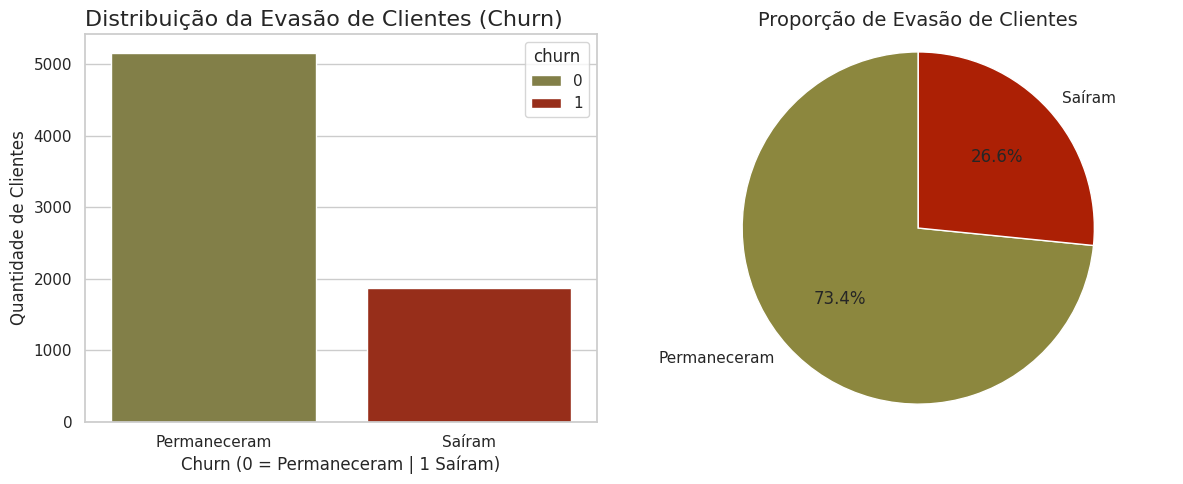

In [45]:
#Gr√°fico em pizza
churn_counts = dados_limpos['churn'].value_counts()
labels = ['Permaneceram', 'Sa√≠ram']
colors = ['#8c873e', '#ac2005']

sns.set(style='whitegrid')

fig, axes = plt.subplots(1,2, figsize=(12,5))

#Gr√°fico em barras
colors_barras = ['#8c873e', '#ac2005']
sns.countplot(x='churn', data=dados_limpos, hue='churn', palette=colors_barras, ax=axes[0])
axes[0].set_title('Distribui√ß√£o da Evas√£o de Clientes (Churn)', loc='left', fontsize=16)
axes[0].set_xlabel('Churn (0 = Permaneceram | 1 Sa√≠ram)', fontsize=12)
axes[0].set_ylabel('Quantidade de Clientes', fontsize=12)
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(labels)


axes[1].pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Propor√ß√£o de Evas√£o de Clientes', fontsize=14)
axes[1].axis('equal')

plt.tight_layout()
plt.show()

> üìå Os gr√°ficos acima revelam que cerca de 26,6% dos clientes sa√≠ram da empresa, enquanto 73,4% permaneceram.



### **Contagem de Evas√£o por Vari√°veis Categ√≥ricas**

Essa etapa busca identificar padr√µes na evas√£o de clientes ao analisar vari√°veis categ√≥ricas, como g√™nero, tipo de contrato e m√©todo de pagamento. A ideia √© compreender se certos perfis t√™m maior probabilidade de cancelar o servi√ßo, permitindo direcionar estrat√©gias mais eficazes para reten√ß√£o.

In [32]:
#Dicion√°rio para deixar os r√≥tulos mais leg√≠veis
nomes_legiveis = {
    'gender': 'G√™nero',
    'contract': 'Tipo de Contrato',
    'payment_method': 'Forma de Pagamento',
    'internet_service': 'Servi√ßo de Internet',
    'streaming_tv': 'Streaming de TV',
    'multiple_lines': 'Linhas Telef√¥nicas',
    'churn': 'Evas√£o',
}

Gerar gr√°ficos que mostram a distribui√ß√£o absoluta de clientes que cancelaram o servi√ßo.

In [33]:
#Fun√ß√£o para plotar gr√°ficos
def plot_churn_plotly(col):
    # Substitui os valores bin√°rios para legenda
    dados_plot = dados_limpos.copy()
    dados_plot['churn'] = dados_plot['churn'].replace({0: 'Permaneceram', 1: 'Sa√≠ram'})

    fig = px.histogram(
        dados_plot,
        x=col,
        color='churn',
        barmode='group',
        text_auto=True,
        color_discrete_map={'Permaneceram': '#8c873e', 'Sa√≠ram': '#ac2005'},
        labels={
            col: nomes_legiveis.get(col, col).title(),
            'churn': 'Status do Cliente'
        }
    )

    fig.update_layout(

        title=f'Evas√£o por {nomes_legiveis.get(col, col).title()}',
        xaxis_title=nomes_legiveis.get(col, col).title(),
        yaxis_title='Quantidade de Clientes',
        legend_title='Status',
        bargap=0.2
    )

    fig.show()

Gerar gr√°ficos que mostram a distribui√ß√£o absoluta de clientes que cancelaram o servi√ßo.

In [34]:
#Fun√ß√£o para plotar gr√°ficos
def plot_churn_plotly(col):
    # Substitui os valores bin√°rios para legenda
    dados_plot = dados_limpos.copy()
    dados_plot['churn'] = dados_plot['churn'].replace({0: 'Permaneceram', 1: 'Sa√≠ram'})

    fig = px.histogram(
        dados_plot,
        x=col,
        color='churn',
        barmode='group',
        text_auto=True,
        color_discrete_map={'Permaneceram': '#8c873e', 'Sa√≠ram': '#ac2005'},
        labels={
            col: nomes_legiveis.get(col, col).title(),
            'churn': 'Status do Cliente'
        }
    )

    fig.update_layout(

        title=f'Evas√£o por {nomes_legiveis.get(col, col).title()}',
        xaxis_title=nomes_legiveis.get(col, col).title(),
        yaxis_title='Quantidade de Clientes',
        legend_title='Status',
        bargap=0.2
    )

    fig.show()

Visualiza√ß√£o da propor√ß√£o de clientes que cancelaram o servi√ßo, permitindo uma an√°lise clara da taxa de churn e poss√≠veis tend√™ncias.

In [46]:
#Fun√ß√£o para plotar gr√°ficos
def plot_churn_percent_plotly(col):
    # C√≥pia dos dados
    df = dados_limpos.copy()

    # Agrupar e calcular a propor√ß√£o de churn = 1
    proporcao = (
        df.groupby(col)['churn']
        .mean()
        .reset_index()
        .sort_values('churn', ascending=True)
    )
    proporcao['churn'] *= 100  # converter para %

    # Gr√°fico com Plotly horizontal
    fig = px.bar(
        proporcao,
        x='churn',
        y=col,
        orientation='h',
        text='churn',
        labels={
            col: nomes_legiveis.get(col, col).title(),
            'churn': 'Evas√£o (%)'
        },
        color='churn',
        color_continuous_scale='Reds'
    )

    fig.update_layout(

        title=f'Propor√ß√£o de Evas√£o por {nomes_legiveis.get(col, col).title()}',
        xaxis_title='Evas√£o (%)',
        yaxis_title=nomes_legiveis.get(col, col).title(),
        coloraxis_showscale=False
    )

    fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
    fig.show()

**Evas√£o por Tipo de Contrato**

Como pode ser observado o Tipo de Contrato m√™s a m√™s (Month-to-Month) tem a maior insid√™ncia de cancelamentos.

In [36]:
plot_churn_plotly('contract')

Observa-se que clientes com contratos m√™s a m√™s apresentam a maior taxa de churn, destacando a vulnerabilidade desse grupo em compara√ß√£o com outras formas de contrata√ß√£o.

In [37]:
plot_churn_percent_plotly('contract')

**Evas√£o por Forma de pagamento**

O Cheque eletr√¥nico est√° com maior indice de evas√£o. Com 45% das evas√µes dos clientes.

In [38]:
plot_churn_plotly('payment_method')
plot_churn_percent_plotly('payment_method')

**Evas√£o por Servi√ßo de Internet**

A fibra optica consiste com a maior taxa de evas√£o.

In [39]:
plot_churn_plotly('internet_service')
plot_churn_percent_plotly('internet_service')

**Evas√£o por G√™nero**

As mulheres apresentam um n√∫mero um pouco maior de evas√£o em rela√ß√£o aos homens.

In [40]:
df = dados_limpos.copy()

genero_churn = (
        df.groupby('gender')['churn']
        .mean()
        .reset_index()
        .sort_values('churn', ascending=False)
    )
genero_churn['churn'] *= 100

fig = px.bar(
        genero_churn,
        x='gender',
        y='churn',
        text='churn',
        labels={'gender': 'G√™nero', 'churn': 'Evas√£o (%)'},
        color='churn',
        color_continuous_scale='Reds'
    )

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(
        title='Propor√ß√£o de Evas√£o por G√™nero',
        yaxis_title='Evas√£o (%)',
        xaxis_title='G√™nero',
        coloraxis_showscale=False
    )

fig.show()

### **Contagem de Evas√£o por Vari√°veis Num√©ricas**

Nesta se√ß√£o, s√£o comparadas a distribui√ß√£o de quatro vari√°veis num√©ricas entre clientes que permaneceram e os que cancelaram seus servi√ßos (churn).

S√£o elas:
*   tenure
*   monthly_charges
*   contas_diarias

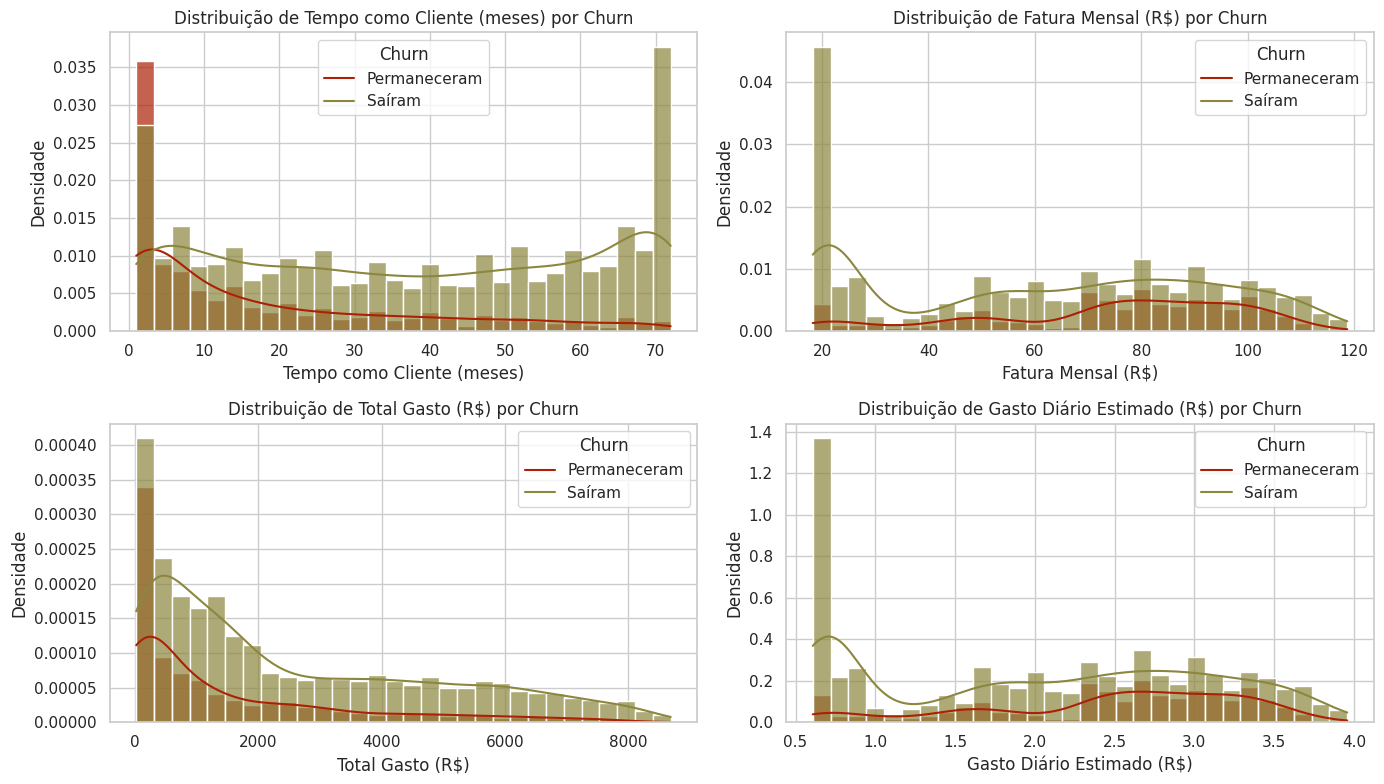

In [52]:
variaveis = ['tenure', 'monthly_charges', 'total_charges', 'contas_diarias']
titulos = {
    'tenure': 'Tempo como Cliente (meses)',
    'monthly_charges': 'Fatura Mensal (R$)',
    'total_charges': 'Total Gasto (R$)',
    'contas_diarias': 'Gasto Di√°rio Estimado (R$)'
}

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()  # facilita itera√ß√£o

# Gerar os 4 gr√°ficos
colors_barras = ['#8c873e', '#ac2005']
for i, col in enumerate(variaveis):
    sns.histplot(
        data=dados_limpos,
        x=col,
        hue='churn',
        kde=True,
        palette=colors_barras,
        bins=30,
        stat='density',
        alpha=0.7,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribui√ß√£o de {titulos[col]} por Churn', fontsize=12)
    axes[i].set_xlabel(titulos[col])
    axes[i].set_ylabel('Densidade')
    axes[i].legend(title='Churn', labels=['Permaneceram', 'Sa√≠ram'])

plt.tight_layout()
plt.show()


Essa an√°lise ajuda a entender como o comportamento financeiro e o tempo de perman√™ncia impactam a evas√£o.

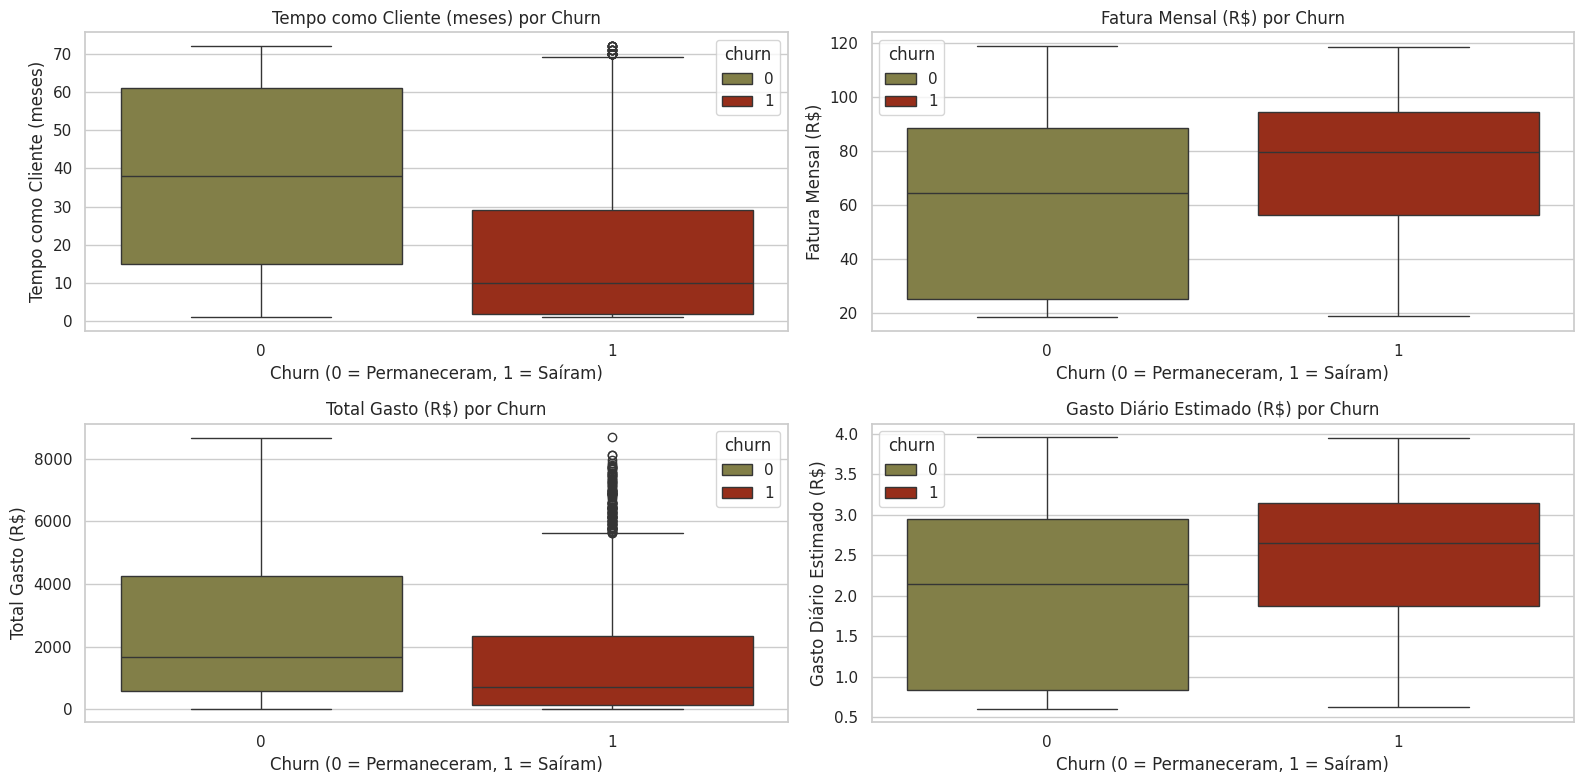

In [54]:
variaveis = ['tenure', 'monthly_charges', 'total_charges', 'contas_diarias']
titulos = {
    'tenure': 'Tempo como Cliente (meses)',
    'monthly_charges': 'Fatura Mensal (R$)',
    'total_charges': 'Total Gasto (R$)',
    'contas_diarias': 'Gasto Di√°rio Estimado (R$)'
}

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()

# Gera√ß√£o dos boxplots
colors_plots = ['#8c873e', '#ac2005']
for i, col in enumerate(variaveis):
    sns.boxplot(
        data=dados_limpos,
        x='churn',
        y=col,
        hue='churn',
        palette=colors_plots,
        ax=axes[i]
    )
    axes[i].set_title(f'{titulos[col]} por Churn', fontsize=12)
    axes[i].set_xlabel('Churn (0 = Permaneceram, 1 = Sa√≠ram)')
    axes[i].set_ylabel(titulos[col])

plt.tight_layout()
plt.show()

### Extra: An√°lise de Correla√ß√£o entre Vari√°veis

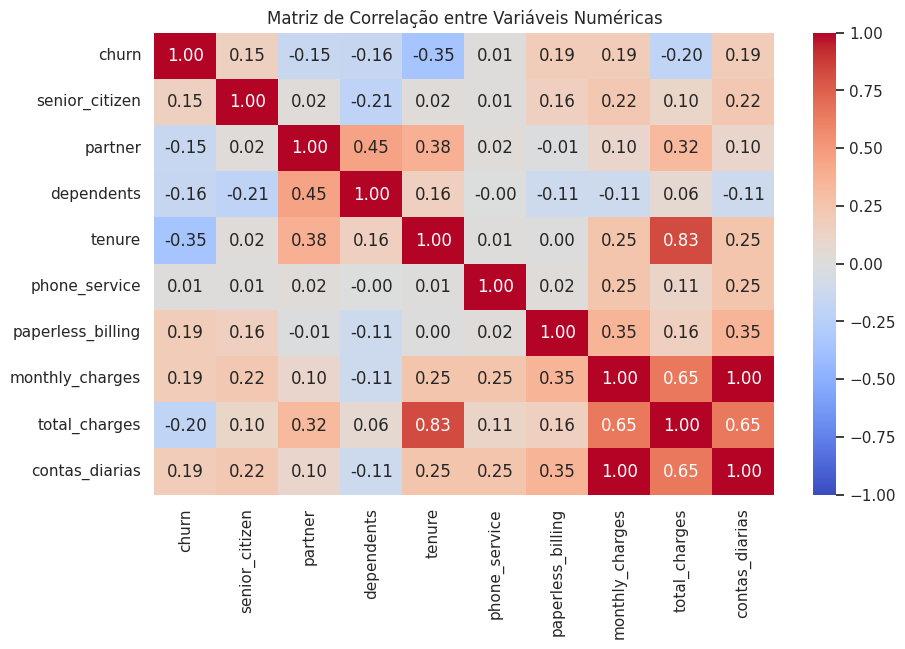

In [43]:
# Seleciona apenas colunas num√©ricas
df_corr = dados_limpos.select_dtypes(include=['int64', 'float64'])

# Calcula correla√ß√£o
correlacoes = df_corr.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlacoes, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correla√ß√£o entre Vari√°veis Num√©ricas')
plt.show()

**tenure:** correla√ß√£o negativa ‚Üí quanto mais tempo de casa, menor a chance de churn.

**total_charges:** tamb√©m negativa ‚Üí clientes antigos gastaram mais e tendem a ficar.

**monthly_charges ou contas_diarias:** correla√ß√£o positiva leve ‚Üí quem paga mais, tende a sair mais.

In [44]:
correlacoes_churn = correlacoes['churn'].sort_values(key=abs, ascending=False)
print(correlacoes_churn)


churn                1.000000
tenure              -0.354049
total_charges       -0.199484
contas_diarias       0.192858
monthly_charges      0.192858
paperless_billing    0.191454
dependents          -0.163128
senior_citizen       0.150541
partner             -0.149982
phone_service        0.011691
Name: churn, dtype: float64


# **Relat√≥rio Final**

### An√°lise de Evas√£o de Clientes (Churn) - TelecomX

A Telecom X enfrenta um alto √≠ndice de cancelamentos de clientes. Para melhorar a reten√ß√£o, √© necess√°rio compreender os fatores que influenciam esse comportamento de evas√£o, conhecido como churn.

Este projeto teve como objetivo analisar os dados de clientes da empresa para identificar padr√µes e poss√≠veis causas de cancelamento, com foco em vari√°veis demogr√°ficas, contratuais e de consumo.

### Limpeza e Tratamento de Dados üßπ

Foram seguidos os seguintes passos para preparar os dados:


*   Importa√ß√£o de dados JSON via API simulada.
*   Normaliza√ß√£o de colunas aninhadas (customer, phone, internet, account).
*   Remo√ß√£o de registros com valores ausentes, especialmente em TotalCharges e Churn.
*   Convers√£o de vari√°veis bin√°rias de "Yes"/"No" para 1/0.
*   Padroniza√ß√£o de nomes de colunas para o formato snake_case (ex: total_charges).
*   Cria√ß√£o da vari√°vel derivada contas_diarias, com base no gasto mensal.

### An√°lise Explorat√≥ria de Dados (EDA) üîé

A seguir, apresentamos os principais resultados explorat√≥rios, divididos em categorias:

üéØ Distribui√ß√£o Geral do Churn

*   Cerca de 26,6% dos clientes cancelaram seus servi√ßos.
*   Gr√°ficos de barras e pizza evidenciam o problema de reten√ß√£o.


üìã Churn por Vari√°veis Categ√≥ricas

Foi analisada a evas√£o por vari√°veis como tipo de contrato, forma de pagamento, internet_service, entre outras.

Principais achados:

*   Clientes com contrato mensal t√™m alta taxa de churn.
*   Formas de pagamento como "Electronic Check" est√£o mais associadas √† evas√£o.
*   Clientes que n√£o possuem servi√ßos extras (como tech_support, online_security) tendem a sair com mais frequ√™ncia.

As an√°lises inclu√≠ram gr√°ficos interativos com Plotly e propor√ß√µes (%) por grupo.


üìà Churn por Vari√°veis Num√©ricas

Foram analisadas vari√°veis como:

*   tenure ‚Üí tempo como cliente
*   monthly_charges ‚Üí gasto mensal
*   total_charges ‚Üí gasto total acumulado
*   contas_diarias ‚Üí gasto di√°rio estimado

Padr√µes observados:

*   Clientes com pouco tempo de casa (tenure baixo) tendem a cancelar mais.
*   Churn mais comum entre clientes com faturas mensais altas.
*   Clientes com total_charges baixo (rec√©m-chegados) apresentam churn elevado.

Gr√°ficos de histogramas e boxplots foram utilizados para visualizar esses padr√µes.

### Conclus√µes e Insightsüí°

*   A an√°lise do churn revela padr√µes importantes sobre os clientes que cancelam seus servi√ßos. Observamos que a evas√£o √© predominantemente registrada entre usu√°rios que possuem pouco tempo de perman√™ncia na empresa, indicando uma tend√™ncia de desist√™ncia precoce.
*   Al√©m disso, clientes com contratos mensais apresentam os maiores √≠ndices de churn, sugerindo uma maior vulnerabilidade desse modelo de assinatura. A cobran√ßa via electronic check tamb√©m se destaca como um fator associado ao cancelamento, possivelmente devido √† praticidade limitada desse m√©todo de pagamento.
*   Clientes que pagam mais por m√™s e n√£o utilizam servi√ßos adicionais est√£o mais propensos a cancelar, refor√ßando a import√¢ncia de agregar valor √† experi√™ncia do cliente.

### Recomenda√ß√µes ‚úÖ

Com base nesses insights, recomenda-se que a Telecom X adote estrat√©gias para minimizar a evas√£o e fortalecer a reten√ß√£o de clientes:

*   Incentivar contratos de longo prazo: Criar programas de fidelidade, oferecer descontos progressivos ou benef√≠cios exclusivos para clientes que optam por assinaturas anuais.
*   Ampliar o valor dos servi√ßos adicionais: Estimular a ades√£o a pacotes como suporte t√©cnico premium, seguran√ßa online ou benef√≠cios exclusivos para quem utiliza mais servi√ßos da empresa.
*   Revisar m√©todos de pagamento: Reduzir a depend√™ncia do electronic check, promovendo op√ß√µes mais convenientes como d√©bito autom√°tico, cart√£o de cr√©dito ou PIX, para facilitar transa√ß√µes e reduzir cancelamentos.
*   Aprimorar o suporte nos primeiros meses: Implementar uma jornada de boas-vindas personalizada, com contato proativo, ofertas especiais e suporte dedicado para os novos clientes.